In [1]:
%pylab inline
from hscictools import demographics
from hscictools.demographics import age_gender_tornado,age_gender_tornado_with_index
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Demographics

Exploration of the data reported here:

- https://apps.nhsbsa.nhs.uk/infosystems/data/showDataSelector.do?reportId=128

# By Nation

This is how people receiving primary care are distributed when aggregated across all practices.

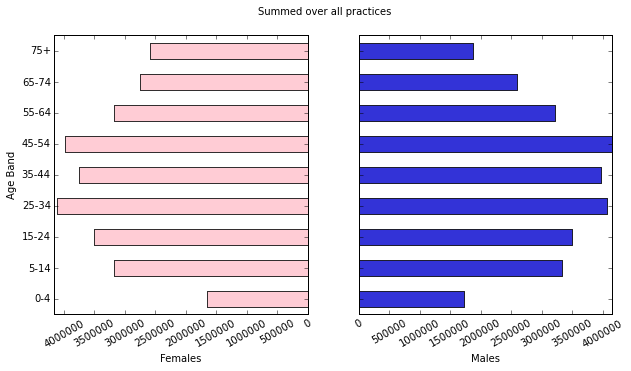

In [2]:
age_gender_tornado(demographics.by_Nation(),title="Summed over all practices")

In [3]:
nation=pd.DataFrame(demographics.by_Nation(),columns=['Nation'])
nation.unstack()

Nation                                                        \
Age Band      0-4    15-24    25-34    35-44    45-54     5-14    55-64   
Gender                                                                    
Female    1648112  3498364  4114842  3751321  3976810  3172037  3183521   
Male      1733288  3504914  4073410  3967082  4157577  3326919  3215317   

                            
Age Band    65-74      75+  
Gender                      
Female    2759875  2583758  
Male      2596973  1874320

In [22]:
nation.unstack(0).sum()

        Gender
Nation  Female    28688640
        Male      28449800
dtype: int64

In [39]:
nation.sum()

Nation    57138440
dtype: int64

# By Practice

Here we look practice by practice, and compare to the national distribution as a baseline for picking up deviations.

I'm just showing the top N largest practices.

In [4]:
demographics.by_Practice().head()

Gender                                             Female                    \
Age Band                                              0-4 15-24 25-34 35-44   
PCO Name  Practice Name              Practice Code                            
ADDACTION ADDACTION CORNWALL CENTRAL Y00898             0     0     0     0   
          ADDACTION LEAMINGTON       Y02231             0     0     0     0   
          ADDACTION NUNEATON         Y02229             0     0     0     0   
          ADDACTION RUGBY            Y02230             0     0     0     0   
          ADDACTION STRATFORD        Y03447             0     0     0     0   

Gender                                                                         \
Age Band                                           45-54 5-14 55-64 65-74 75+   
PCO Name  Practice Name              Practice Code                              
ADDACTION ADDACTION CORNWALL CENTRAL Y00898            0    0     0     0   0   
          ADDACTION LEAMINGTON       Y02231            0    0     0     0   0   
          ADDACTION NUNEATON         Y02229            0    0     0     0   0   
          ADDACTION RUGBY            Y02230            0    0     0     0   0   
          ADDACTION STRATFORD        Y03447            0    0     0     0   0   

Gender                                             Male                    \
Age Band                                            0-4 15-24 25-34 35-44   
PCO Name  Practice Name              Practice Code                          
ADDACTION ADDACTION CORNWALL CENTRAL Y00898           0     0     0     0   
          ADDACTION LEAMINGTON       Y02231           0     0     0     0   
          ADDACTION NUNEATON         Y02229           0     0     0     0   
          ADDACTION RUGBY            Y02230           0     0     0     0   
          ADDACTION STRATFORD        Y03447           0     0     0     0   

Gender                                                                         
Age Band                                           45-54 5-14 55-64 65-74 75+  
PCO Name  Practice Name              Practice Code                             
ADDACTION ADDACTION CORNWALL CENTRAL Y00898            0    0     0     0   0  
          ADDACTION LEAMINGTON       Y02231            0    0     0     0   0  
          ADDACTION NUNEATON         Y02229            0    0     0     0   0  
          ADDACTION RUGBY            Y02230            0    0     0     0   0  
          ADDACTION STRATFORD        Y03447            0    0     0     0   0

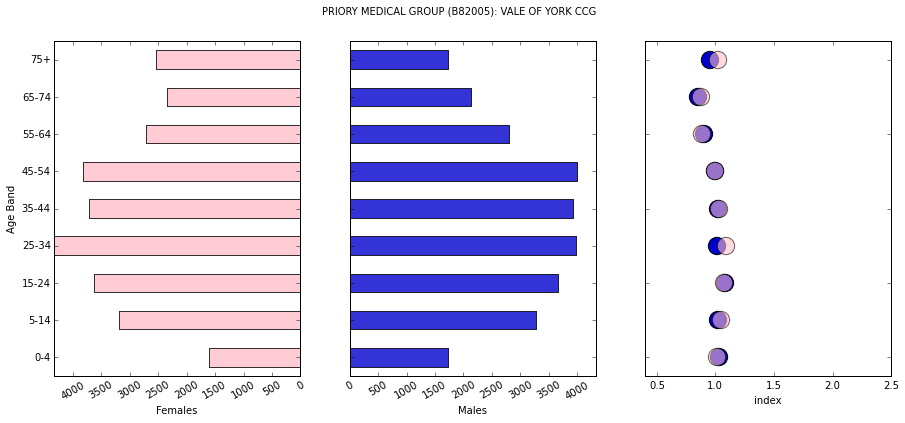

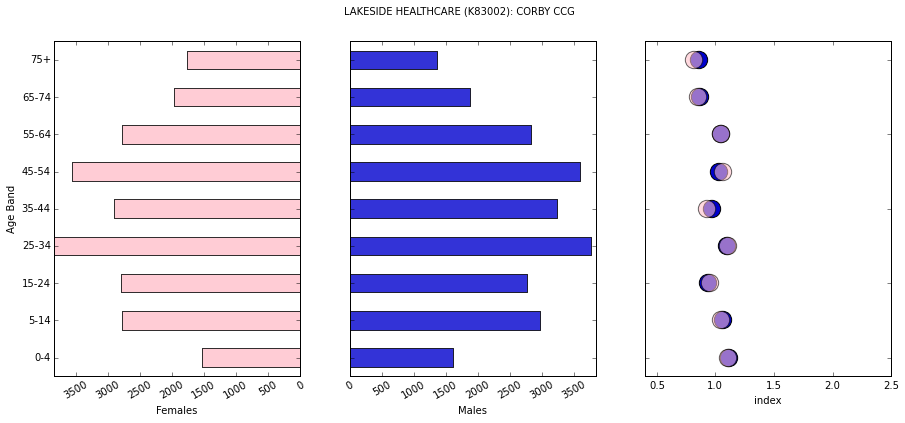

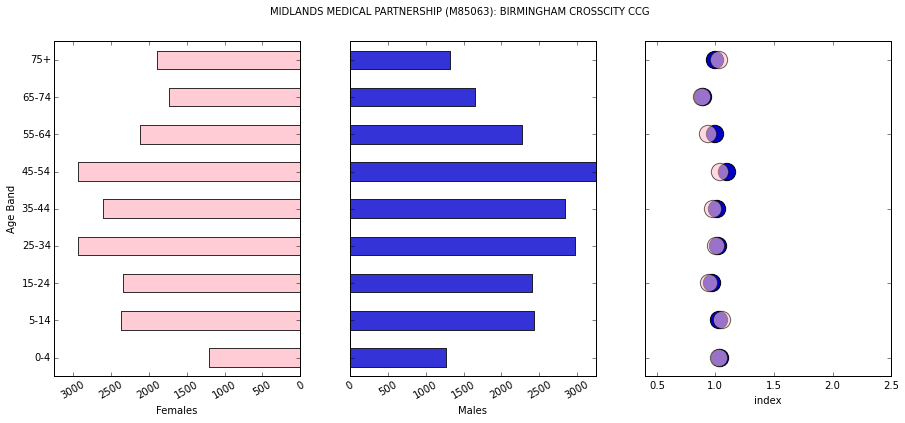

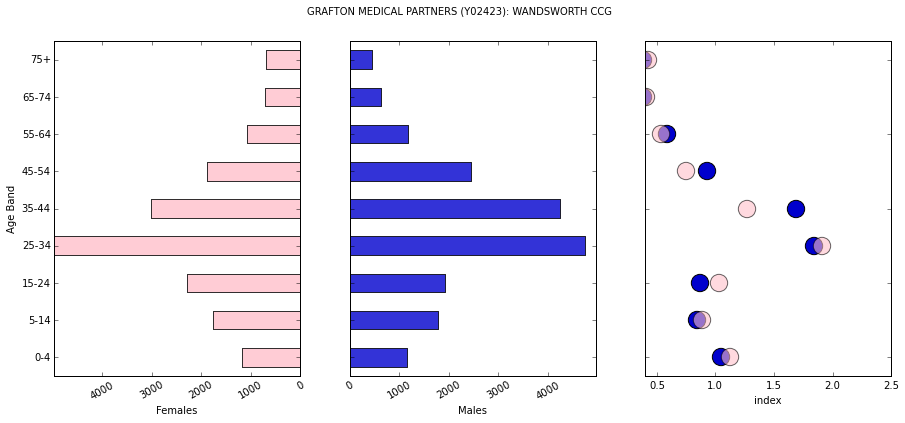

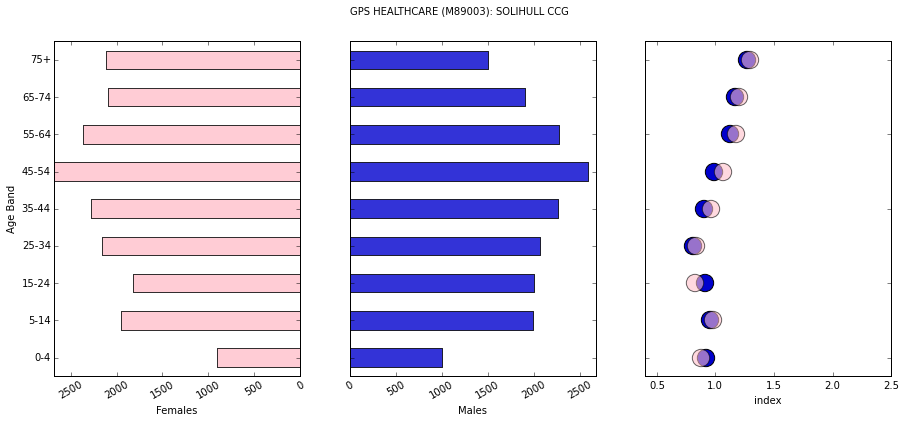

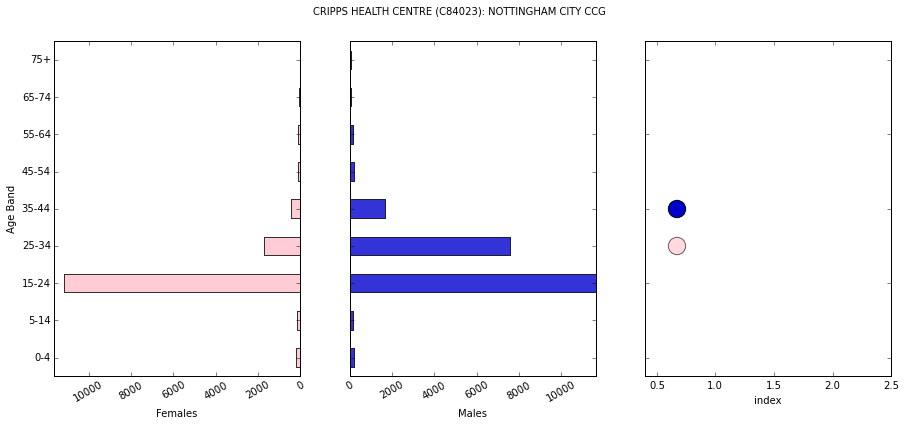

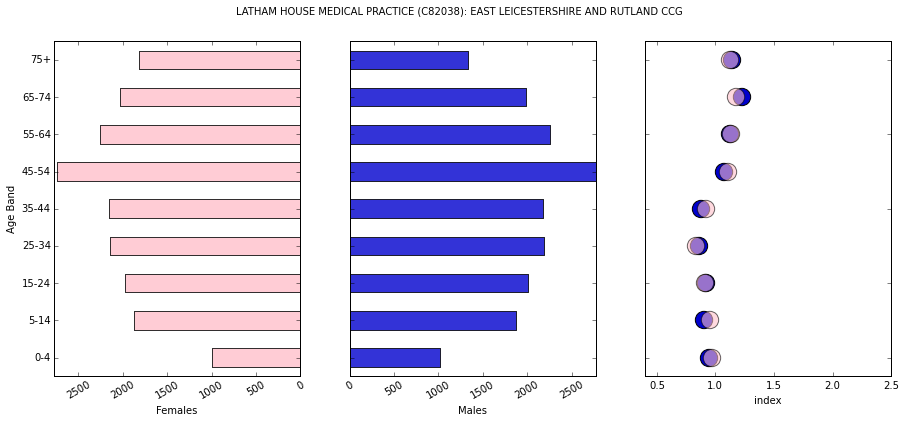

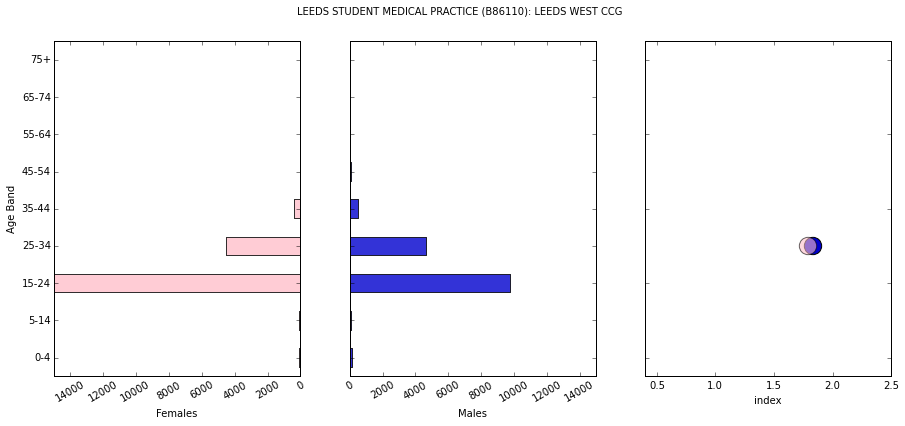

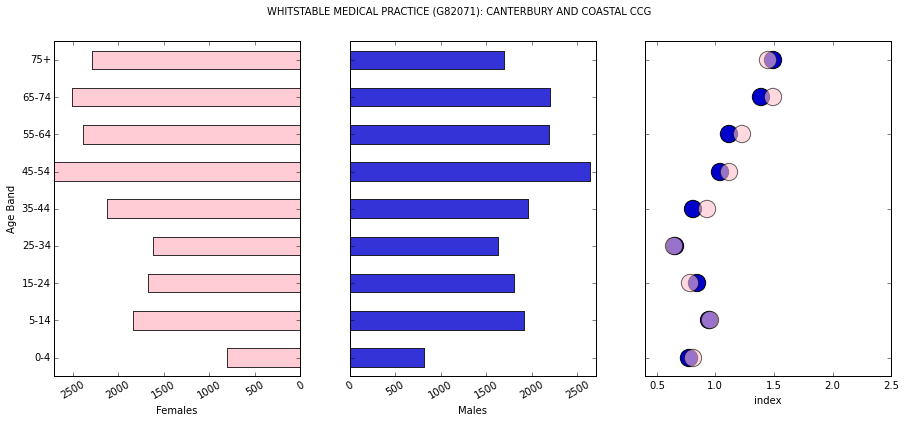

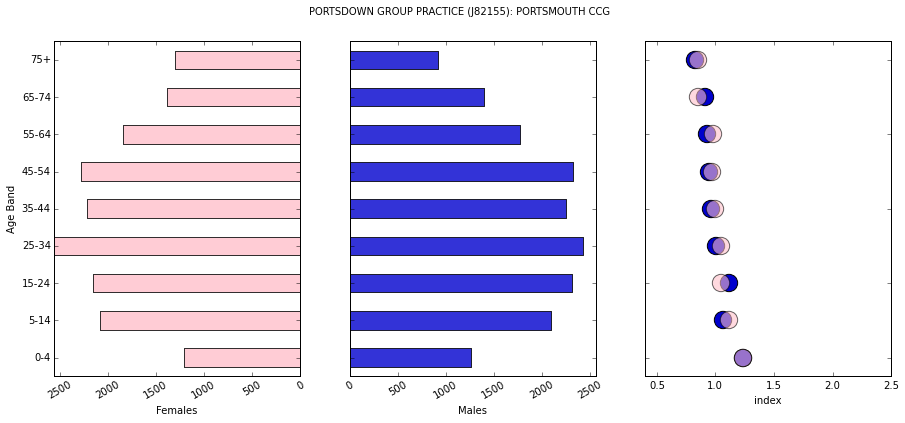

In [14]:
practicedemogs=demographics.by_Practice()
for i in practicedemogs.stack((0,1)).groupby(level=(0,1,2)).sum().sort(inplace=False,ascending=False).index[:10]:
    age_gender_tornado_with_index(practicedemogs.ix[i],nation,title="%s (%s): %s" % (i[1],i[2],i[0]))

## Search

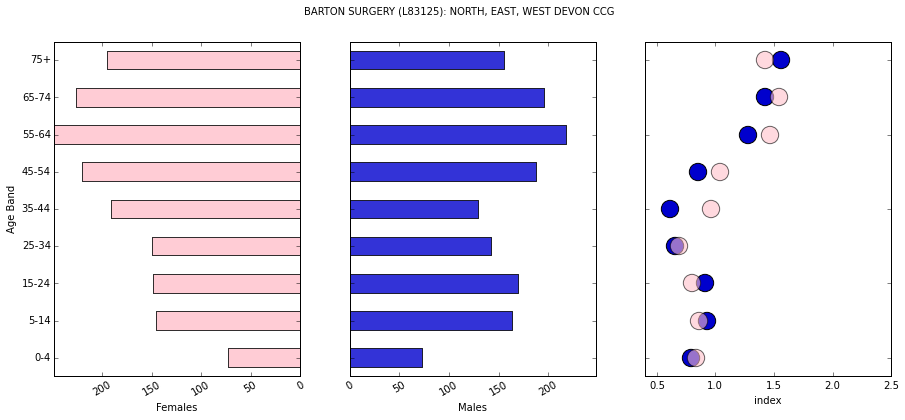

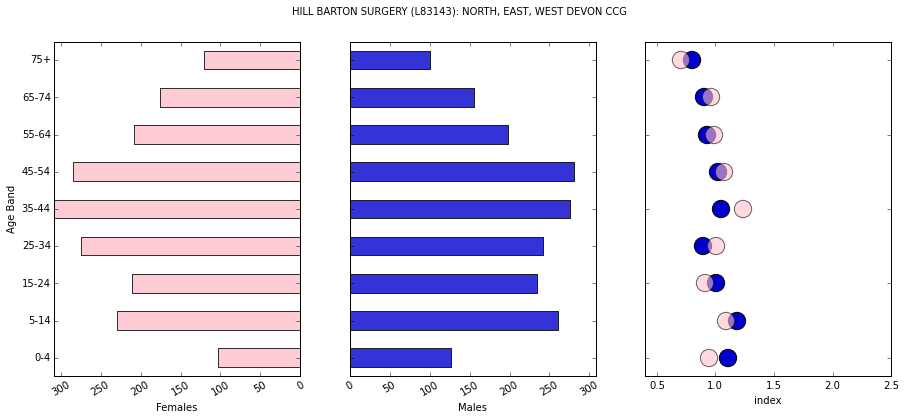

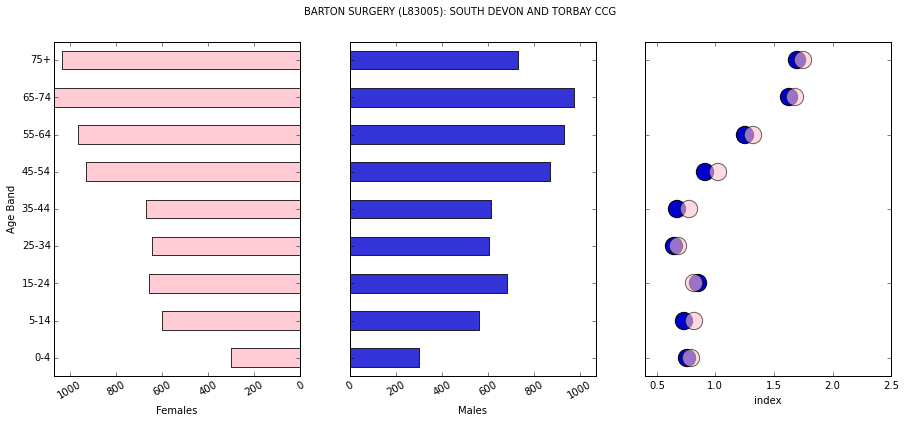

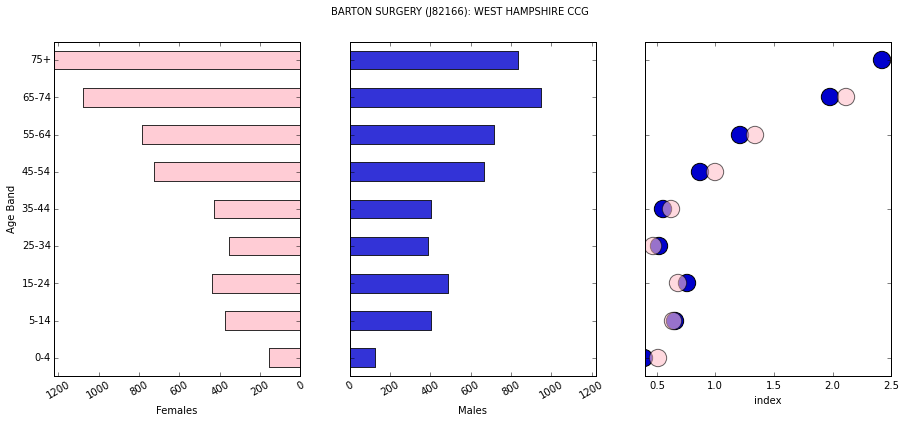

In [44]:
for i in practicedemogs.index:
    if filter(lambda x: x.lower() in ' '.join(i).lower(),"BARTON SURGERY".split(',')):
        age_gender_tornado_with_index(practicedemogs.ix[i],nation,title="%s (%s): %s" % (i[1],i[2],i[0]))


# By CCG

Here I roll up to the CCG.

In [8]:
demographics.by_CCG().head()

Gender                                     Female                              \
Age Band                                      0-4  15-24  25-34  35-44  45-54   
PCO Name                            CCG ID                                      
ADDACTION                           NI3         0      0      0      0      0   
AIREDALE, WHARFEDALE AND CRAVEN CCG 02N      4298   8467   8988   9660  11528   
ASHFORD CCG                         09C      3753   7247   8040   8424   9500   
AYLESBURY VALE CCG                  10Y      6120  11402  12596  14207  16213   
BARKING & DAGENHAM CCG              07L      9148  13275  19107  16401  12904   

Gender                                                                 Male  \
Age Band                                     5-14  55-64  65-74   75+   0-4   
PCO Name                            CCG ID                                    
ADDACTION                           NI3         0      0      0     0     0   
AIREDALE, WHARFEDALE AND CRAVEN CCG 02N      8998  10056   8966  8991  4396   
ASHFORD CCG                         09C      7949   7215   6914  5712  3882   
AYLESBURY VALE CCG                  10Y     12239  12491  10320  8915  6431   
BARKING & DAGENHAM CCG              07L     16448   8128   5318  5434  9587   

Gender                                                                         \
Age Band                                    15-24  25-34  35-44  45-54   5-14   
PCO Name                            CCG ID                                      
ADDACTION                           NI3         0      0      0      0      0   
AIREDALE, WHARFEDALE AND CRAVEN CCG 02N      8863   8916   9653  11691   9704   
ASHFORD CCG                         09C      7826   7316   7818   9467   8147   
AYLESBURY VALE CCG                  10Y     11988  11728  13696  16436  13050   
BARKING & DAGENHAM CCG              07L     13197  16852  17062  14075  17005   

Gender                                                         
Age Band                                    55-64 65-74   75+  
PCO Name                            CCG ID                     
ADDACTION                           NI3         0     0     0  
AIREDALE, WHARFEDALE AND CRAVEN CCG 02N     10075  8470  6137  
ASHFORD CCG                         09C      7071  6338  4300  
AYLESBURY VALE CCG                  10Y     12672  9773  6670  
BARKING & DAGENHAM CCG              07L      8820  4805  3632

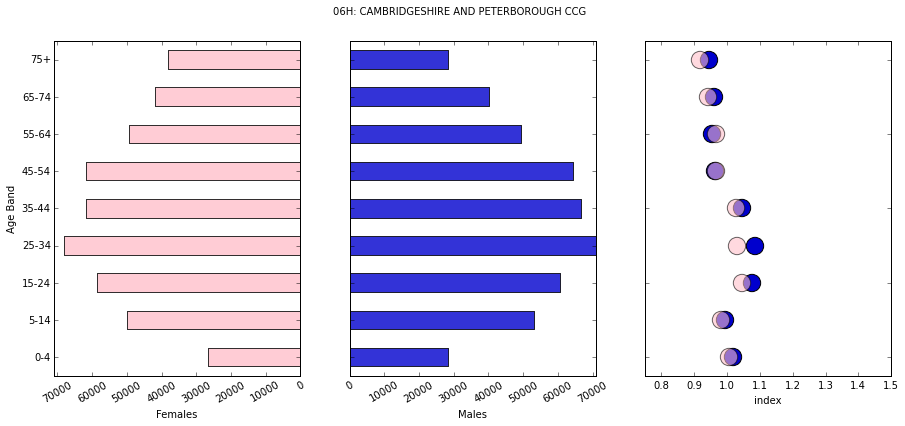

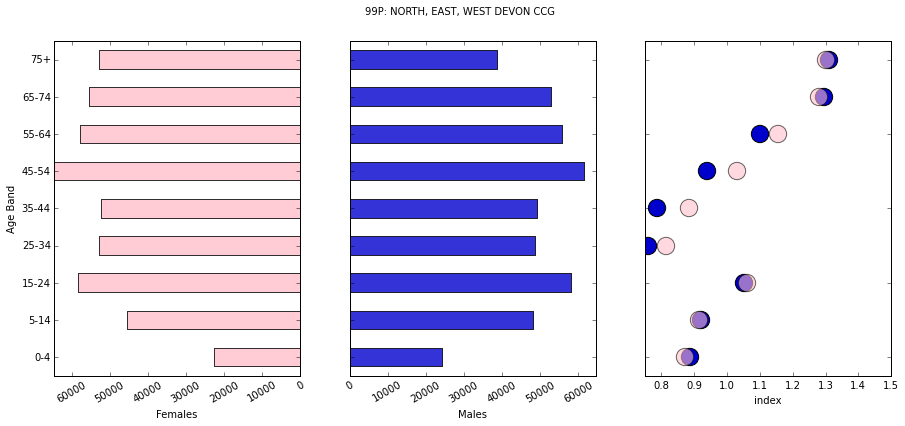

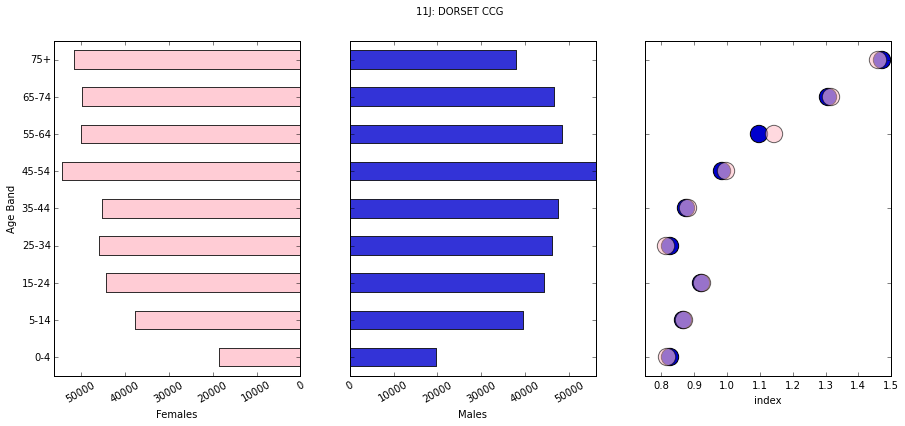

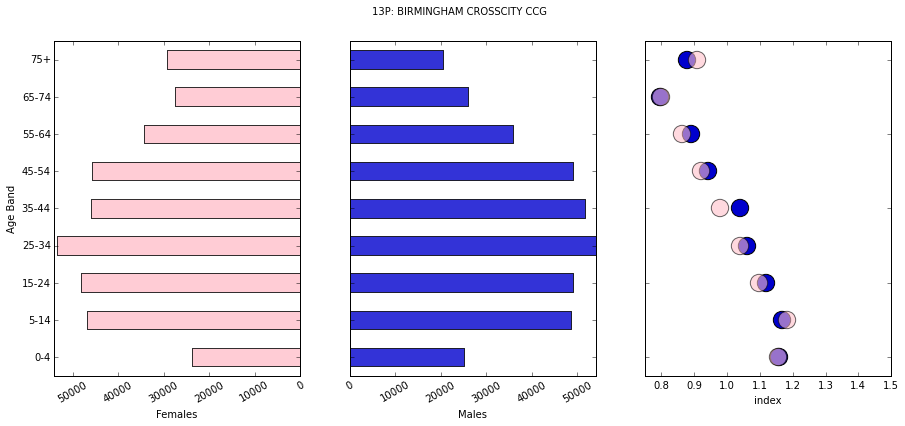

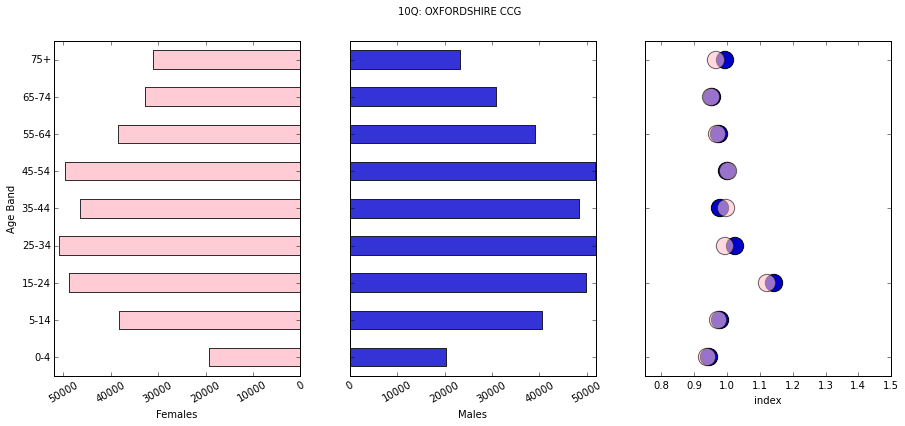

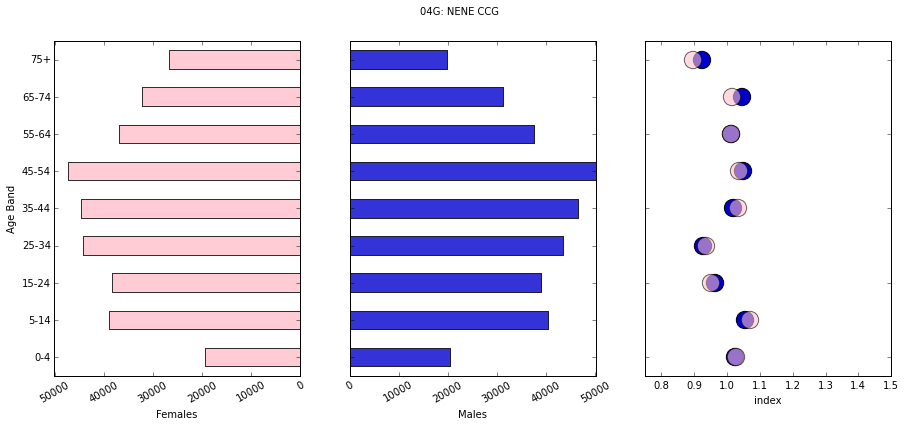

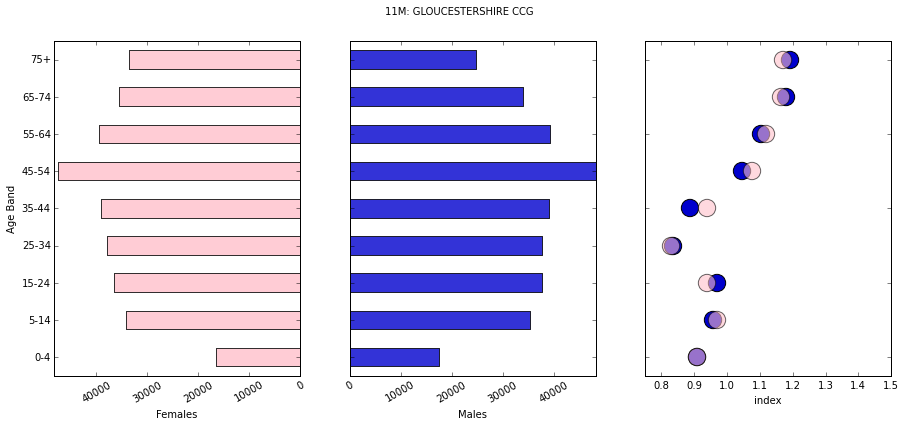

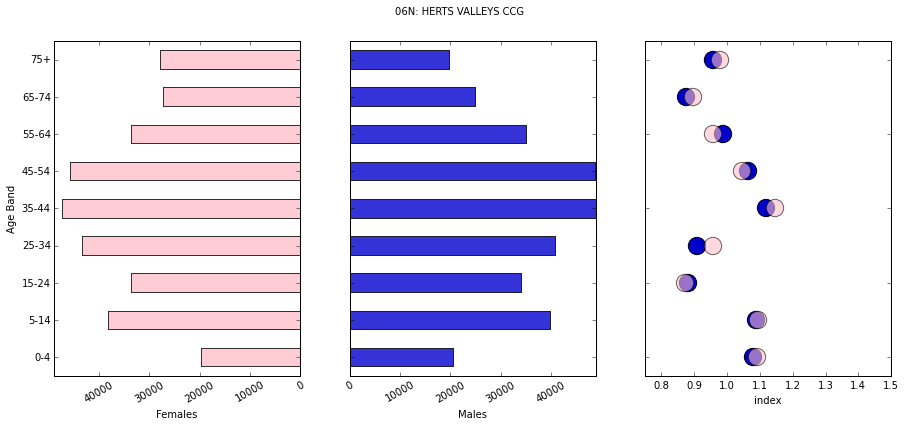

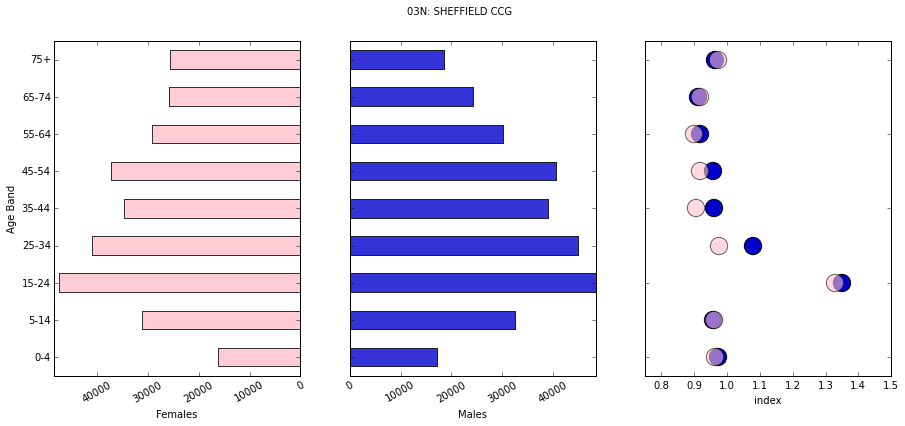

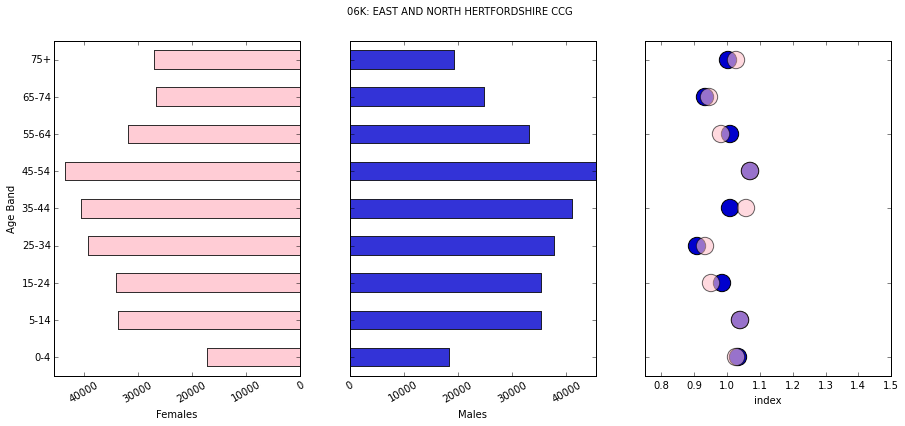

In [11]:
ccgdemogs=demographics.by_CCG()
for i in ccgdemogs.stack((0,1)).groupby(level=(0,1)).sum().sort(inplace=False,ascending=False).index[:10]:
    age_gender_tornado_with_index(ccgdemogs.ix[i],nation,title="%s: %s" % (i[1],i[0]),indexlim=(0.75,1.5))

## Search

Useful to check the demographics of outlier CCGs discovered in the "Exploring UK prescription data with BigQuery and python" notebook.

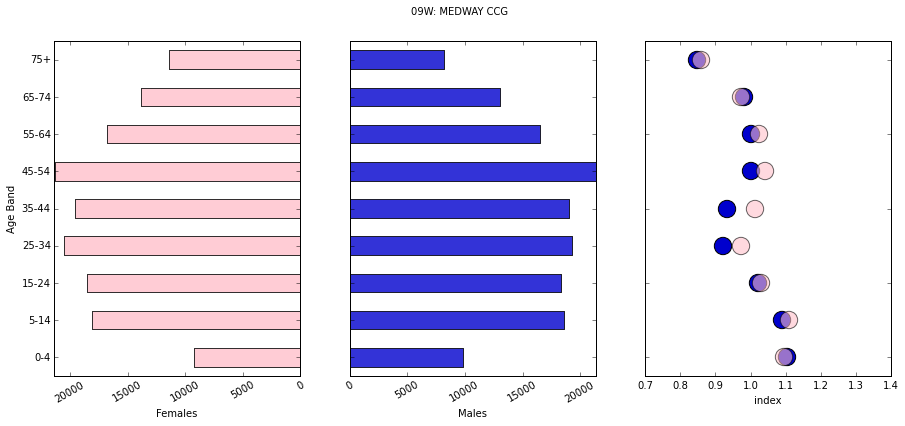

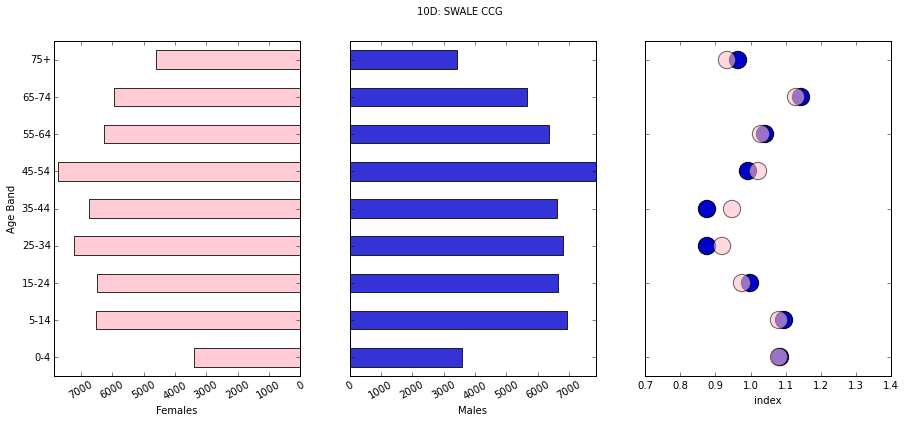

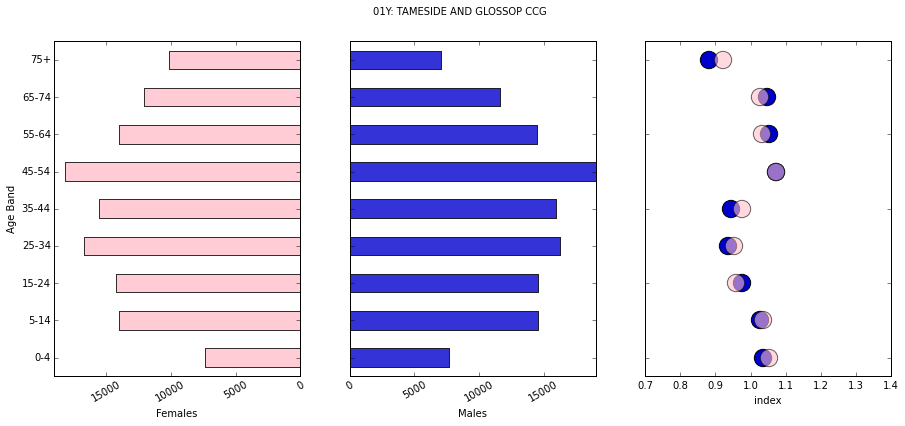

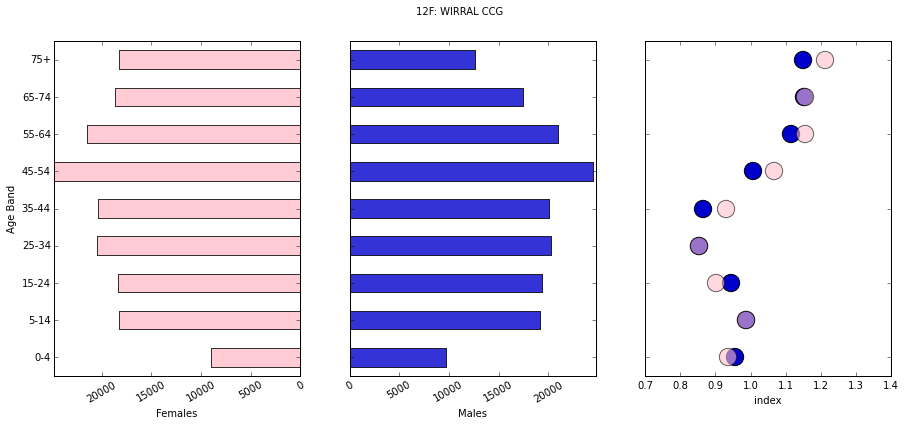

In [54]:
for i in ccgdemogs.index:
    if filter(lambda x: x.lower() in ' '.join(i).lower(),"swale,wirral,medway,glossop".split(',')):
        if ccgdemogs.ix[i].sum() > 0:
            age_gender_tornado_with_index(ccgdemogs.ix[i],nation,title="%s: %s" % (i[1],i[0]),indexlim=(0.7,1.4))